# Build a LLM-powered Chatbot in LangGraph

LangGraph is not just a framework to create static graphs. We already know that it can be used for building stateful, agentic applications using LLMs.

We'll now create a simple LLM-powered chatbot using LangGraph. This chatbot will respond directly to user messages.

![](https://i.imgur.com/heeggTe.png)

In [1]:
!pip install langchain==0.3.14
!pip install langgraph==0.2.66
!pip install langchain-openai==0.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.0
    Uninstalling langsmith-0.3.0:
      Successfully uninstalled langsmith-0.3.0
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.0 MB/s eta 0:00:00


## Enter Open AI API Key

In [2]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Setup Environment Variables

In [3]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

## State

First, define the [State](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the `TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

## Create the Nodes, Edges and Graph

In [5]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

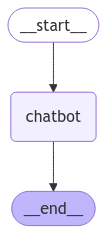

In [6]:
graph

In [7]:
response = graph.invoke({"messages": "Explain AI in 2 bullet points"})
response

{'messages': [HumanMessage(content='Explain AI in 2 bullet points', additional_kwargs={}, response_metadata={}, id='74a94073-783d-43c0-a960-77aeec77c23a'),
  AIMessage(content='- **Definition and Functionality**: Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, particularly computer systems. This includes learning (the acquisition of information and rules for using it), reasoning (using rules to reach approximate or definite conclusions), and self-correction.\n\n- **Applications and Impact**: AI is utilized across various industries, from healthcare (diagnosing diseases) to finance (fraud detection) and entertainment (personalized recommendations), significantly enhancing efficiency, decision-making, and user experiences.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 14, 'total_tokens': 119, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens

In [8]:
response['messages']

[HumanMessage(content='Explain AI in 2 bullet points', additional_kwargs={}, response_metadata={}, id='74a94073-783d-43c0-a960-77aeec77c23a'),
 AIMessage(content='- **Definition and Functionality**: Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, particularly computer systems. This includes learning (the acquisition of information and rules for using it), reasoning (using rules to reach approximate or definite conclusions), and self-correction.\n\n- **Applications and Impact**: AI is utilized across various industries, from healthcare (diagnosing diseases) to finance (fraud detection) and entertainment (personalized recommendations), significantly enhancing efficiency, decision-making, and user experiences.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 14, 'total_tokens': 119, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoni

In [9]:
print(response['messages'][-1].content)

- **Definition and Functionality**: Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, particularly computer systems. This includes learning (the acquisition of information and rules for using it), reasoning (using rules to reach approximate or definite conclusions), and self-correction.

- **Applications and Impact**: AI is utilized across various industries, from healthcare (diagnosing diseases) to finance (fraud detection) and entertainment (personalized recommendations), significantly enhancing efficiency, decision-making, and user experiences.


## Invoking vs. Streaming in LangGraph

In [ ]:
response = graph.invoke({"messages": "Explain AI in 1 line to a child"})
print(response['messages'][-1].content)

AI is like a smart robot that can learn and help us solve problems or answer questions!


In [ ]:
response = graph.invoke({"messages": "What did we discuss so far?"})
print(response['messages'][-1].content)

I don't have access to previous conversations or any context from earlier interactions. Each session is treated independently, so I can't recall what we've discussed before. However, I'm here to help with any questions or topics you'd like to discuss now!


In [ ]:
for event in graph.stream({"messages": "Explain AI in 1 line to a child"},
                          stream_mode='values'):
    print(event['messages'])

[HumanMessage(content='Explain AI in 1 line to a child', additional_kwargs={}, response_metadata={}, id='88f4c9d4-271b-499a-ac3d-ef0d53c5fa87')]
[HumanMessage(content='Explain AI in 1 line to a child', additional_kwargs={}, response_metadata={}, id='88f4c9d4-271b-499a-ac3d-ef0d53c5fa87'), AIMessage(content='AI is like a smart robot that can learn and help us solve problems or answer questions!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bd83329f63', 'finish_reason': 'stop', 'logprobs': None}, id='run-a61d6275-373d-4f33-b43f-47d14eadba0f-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_t

In [ ]:
for event in graph.stream({"messages": "Explain AI in 1 line to a child"},
                          stream_mode='updates'):
    print(event)

{'chatbot': {'messages': [AIMessage(content='AI is like a smart robot that can learn and help us solve problems or answer questions!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 16, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-5b5bcf4f-741a-4128-abd2-697c0211fb1e-0', usage_metadata={'input_tokens': 16, 'output_tokens': 19, 'total_tokens': 35, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
